# Python DateTime functions

Demonstrates how to convert from TLE `refepoch` format `YYddd.ffffff` to Python `timetuple` and then to `EpSeconds`.

First import `numpy` and `datetime` libraries...

In [35]:
import datetime as dt
import numpy as np

...then read in a satellite from the Celestrak `gps-ops.txt` file - get today's here:

http://www.celestrak.com/NORAD/elements/gps-ops.txt

In [49]:
tlefile=open(r'C:\Notebooks\ENG4350\gps-ops.txt', 'rt')

line0=tlefile.readline()
line1=tlefile.readline()
line2=tlefile.readline()

tlefile.close()

print(line0, line1, line2)

GPS BIIR-2  (PRN 13)    
 1 24876U 97035A   18050.86160433  .00000068  00000-0  00000+0 0  9999
 2 24876  55.5066 217.3716 0034407  93.2441 267.1230  2.00565133150792



...next we extract the epoch from the TLE - its located in line 1, see the Software Specification for details

We extract this both as a float and as a string

In [46]:
refepochFloat = np.float(line1[18:32])
refepochFloat

18050.86160433

In [7]:
refepochString = line1[18:32]
refepochString

'18050.86160433'

...next step is to use the string to convert the year and day number information to a `datetime tuple` 

- `datetime tuple` - one of Python's data types 
- note the use of `strptime` (this is actually C function being called in the background!) - the string specifiers are `%y` - 2-digit year and `%j` - day of year, details on the specifiers are here:

https://docs.python.org/3.6/library/datetime.html (scroll down to section 8.1.8)

In [14]:
RefEpochdt = dt.datetime.strptime(refepochString[:5],'%y%j')
RefEpochdt

datetime.datetime(2018, 2, 19, 0, 0)

...next step is to add (actually replace) the hour, minute, second and microsecond information from the fraction of a day in the TLE

- there is likely a more elegant or *Pythonic* way to do this...

In [55]:
dfrac = refepochFloat - np.int(refepochFloat)
hr = np.int(dfrac*24)
rem = dfrac*24 - hour
mins = np.int(60*rem)
rem2 = rem*60 - mins
secs = np.int(60*rem2)
mics = np.int((rem2*60-secs)*10**6)

RefEpochdt = RefEpochdt.replace(hour=hr, minute=mins, 
                                second=secs, microsecond=mics)

RefEpochdt


datetime.datetime(2018, 2, 19, 20, 40, 42, 614111)

In [57]:
print(RefEpochdt.strftime('%d %b %Y %H:%M:%S.%f'))

19 Feb 2018 20:40:42.614111


...last snippet is to demonstrate how to obtain Epseconds

- this is the number of seconds from the TLE epoch to a desired time in the future (i.e. the start of your designated tracking time)
- we need the UTC time for the tracking period - in the example below, I take the time from the computer's clock and convert to UTC using the time zone settings - but you will need to convert a desired local time to UTC - here we take UTC-5 timezone, 12:00

- the second step is to calculate the time delta and convert this to seconds

In [37]:
trackingtime = dt.datetime.utcnow()
trackingtime

datetime.datetime(2018, 3, 2, 16, 20, 27, 391741)

In [58]:
trackingtime = trackingtime.replace(hour=17, minute=0, 
                                    second=0, microsecond=0)
deltat = trackingtime - RefEpochdt
deltat

datetime.timedelta(10, 73157, 385889)

In [59]:
epsec = deltat.total_seconds()
epsec

937157.385889

# Check with STK

- Read in the above TLE into an STK Scenario

- Read properties of the vehicle to see the translation from refepoch to date and time
- Construct a report which gives the current time in `EpSec` - which is the seconds since the epoch in the TLE

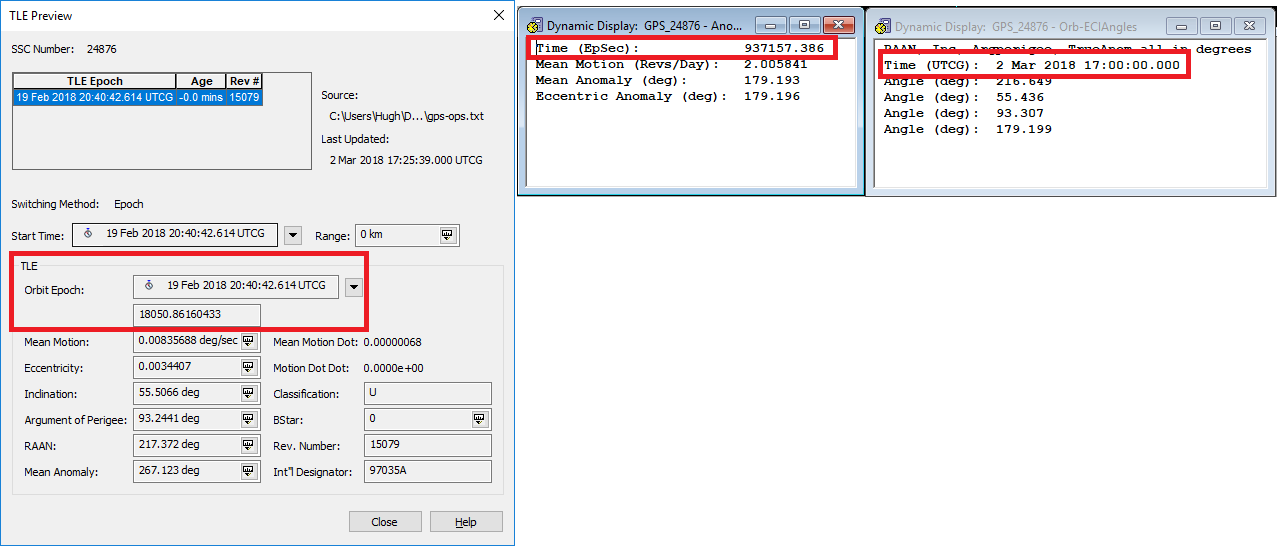

In [43]:
from IPython.display import Image
Image(r'C:\Users\Hugh\Pictures\ENG4350Images\STKCheck1.png', width=1000)